# This is just a small sample analysis of the Steam data we've collected and processed

## Table of contents

* Importing data

* Checking tables

* Analysis: Are Sci-fi RPGs more popular than Fantasy ones?

    * Task
    * Reorganizing data
    * Making plots
    * Analyzing the results


In [1]:
# Module imports
# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time
import re
import ast
import itertools

# third-party imports
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Loading data tables
steam = pd.read_csv('../data/export/steam.csv', dtype={
    'fullgame': 'Int64',
    'total_positive': 'Int64',
    'total_negative': 'Int64'})
missing_ids = pd.read_csv('../data/export/missing_ids.csv')
steam_description_data = pd.read_csv('../data/export/steam_description_data.csv')
steam_media_data = pd.read_csv('../data/export/steam_media_data.csv')
steam_optional = pd.read_csv('../data/export/steam_optional.csv')
steam_packages_info = pd.read_csv('../data/export/steam_packages_info.csv')
steam_requirements_data = pd.read_csv('../data/export/steam_requirements_data.csv')
steam_support_info = pd.read_csv('../data/export/steam_support_info.csv')
steamspy_tag_data = pd.read_csv('../data/export/steamspy_tag_data.csv')

# Let's check our tables:

In [3]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104344 entries, 0 to 104343
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   appid                104344 non-null  int64  
 1   type                 104344 non-null  object 
 2   name                 104344 non-null  object 
 3   required_age         104344 non-null  int64  
 4   dlc                  9804 non-null    object 
 5   fullgame             35362 non-null   Int64  
 6   supported_languages  104180 non-null  object 
 7   developers           104300 non-null  object 
 8   publishers           104301 non-null  object 
 9   packages             82422 non-null   object 
 10  platforms            104344 non-null  object 
 11  categories           104228 non-null  object 
 12  genres               104142 non-null  object 
 13  achievements         104344 non-null  int64  
 14  release_date         97333 non-null   object 
 15  last_modified    

In [4]:
steam.sample(10)

appid  type                                               name  \
65530   1326720   dlc  TIGER GAME ASSETS TOP DOWN BATTLE TANK GAME AS...   
90010   1735720   dlc                             蛊婆- Secret Mission秘密任务   
50420   1080510   dlc                      Nyasha Valkyrie - Artbook 18+   
14498    449010   dlc  RTK13 - Mitsuteru Yokoyama's “Sangokushi” tie-...   
79072   1563420  game                                    Crazy Christmas   
49557   1066290  game                                              猎魔者战纪   
11714    398900  game                                              Fjall   
99835   1918310   dlc         Kiku Wallpaper Launcher - Hanami Wallpaper   
100082  1923450  game                               Building destruction   
17956    514350  game                                 Fancy Slingshot VR   

        required_age  dlc  fullgame                  supported_languages  \
65530              0  NaN   1326710                          ['English']   
90010              0  NaN   1329350    ['English', 'Simplified Chinese']   
50420              0  NaN   1061470                          ['English']   
14498              0  NaN    363150  ['Japanese', 'Traditional Chinese']   
79072              0  NaN      <NA>                          ['English']   
49557              0  NaN      <NA>               ['Simplified Chinese']   
11714              0  NaN      <NA>                          ['English']   
99835              0  NaN   1107950                          ['English']   
100082             0  NaN      <NA>               ['English', 'Russian']   
17956              0  NaN      <NA>                          ['English']   

                            developers                        publishers  \
65530                  ['TigerQiuQiu']                   ['TigerQiuQiu']   
90010                 ['Magyu Studio']  ['Magyu Studio', 'LightOn Game']   
50420             ['Zloy Krot Studio']                     ['IR Studio']   
14498   ['KOEI TECMO GAMES CO., LTD.']    ['KOEI TECMO GAMES CO., LTD.']   
79072                ['Anemona Games']                 ['Anemona Games']   
49557                  ['Yuna Studio']                   ['Yuna Studio']   
11714           ['dimecoin', 'Bestow']           ['Dimecoin Games, LLC']   
99835                    ['Kiku Apps']                     ['Kiku Apps']   
100082                      ['Enoops']                        ['Enoops']   
17956                        ['哈视奇科技']                         ['哈视奇科技']   

                packages  ... coming_soon price review_score  total_positive  \
65530           [463290]  ...       False  0.79          0.0               0   
90010                NaN  ...       False  0.00          0.0               3   
50420           [362796]  ...       False  3.29          0.0               0   
14498                NaN  ...       False   NaN          0.0               4   
79072           [552294]  ...       False  1.75          0.0               1   
49557           [356877]  ...       False  2.39          8.0              74   
11714            [77364]  ...       False  2.99          0.0               1   
99835           [690960]  ...       False  3.29          0.0               0   
100082          [692916]  ...       False  8.99          6.0              13   
17956   [119985, 285431]  ...       False  0.99          5.0               8   

       total_negative     rating   owners  average_forever  median_forever  \
65530               0  50.000000  0-20000                0               0   
90010               0  67.059371  0-20000                0               0   
50420               0  50.000000  0-20000                0               0   
14498               0  69.199408  0-20000                0               0   
79072               1  50.000000  0-20000                0               0   
49557              15  74.592517  0-20000                0               0   
11714               0  59.416365  0-20000                0              

In [5]:
steam[['name','supported_languages']].sample(10)

name  \
8176                                            Gunscape   
94117                                       Blade Walker   
48196                                       Hentai Waifu   
15595            Sentinels of the Multiverse - OblivAeon   
80813                                          婚怨Wedding   
77414                                      Break It Down   
1968   Rocksmith - Creedence Clearwater Revival - Bor...   
12228                                             Cibele   
34354                                   Drink Pro Tycoon   
51018                                      Life Hutch VR   

                                     supported_languages  
8176                                         ['English']  
94117                                        ['English']  
48196  ['Arabic', 'Bulgarian', 'Czech', 'Danish', 'Du...  
15595                                        ['English']  
80813                            ['Traditional Chinese']  
77414                                        ['English']  
1968   ['Dutch', 'English', 'French', 'German', 'Ital...  
12228                                        ['English']  
34354         ['English', 'French', 'German', 'Turkish']  
51018                                        ['English']

In [6]:
def f(x):
    if pd.isna(x):
        return []
    try:
        return ast.literal_eval(str(x))   
    except Exception as e:
        print(e)
        return []
    
temp_df = steam[['name','supported_languages']].copy()
#temp_df['supported_languages'] = temp_df['supported_languages'].fillna("[]")
#temp_df['supported_languages'] = temp_df['supported_languages'].apply(lambda x:f(x))
temp_df['supported_languages'] = temp_df[temp_df['supported_languages'].notnull()]['supported_languages'].apply(eval)
temp_df.explode('supported_languages')

name  supported_languages
0               Counter-Strike              English
0               Counter-Strike               French
0               Counter-Strike               German
0               Counter-Strike              Italian
0               Counter-Strike               Korean
...                        ...                  ...
104343  Redout 2 - Season Pass              Russian
104343  Redout 2 - Season Pass   Simplified Chinese
104343  Redout 2 - Season Pass      Spanish - Spain
104343  Redout 2 - Season Pass  Traditional Chinese
104343  Redout 2 - Season Pass              Turkish

[421996 rows x 2 columns]

In [7]:
missing_ids.sample(10)

appid            reason
627  90730  Missing app name
394  61954  Missing app name
265  45665  Missing app name
44    1262  Missing app name
222  41132  Missing app name
83    6254  Missing app name
491  85016  Missing app name
524  90335  Missing app name
493  85601  Missing app name
84    7045  Missing app name

In [8]:
steam_description_data.sample(10)

appid                               detailed_description  \
67462  1362222  Huomaa: Tämä sisältö kuuluu myös FAIRY TAIL Se...   
65534  1330250  Tokyo. The demonic city, plagued with the demo...   
34095   801480  <img src="https://cdn.akamai.steamstatic.com/s...   
18222   521700  To commemorate Kou Shibusawa's 35th anniversar...   
71503  1432162  Expand your FUSER™ library with &quot;Breaking...   
18943   533920  Battle Tank Armata is a simulator of battle ta...   
13300   429690  <img src="https://cdn.akamai.steamstatic.com/s...   
54033  1137533  <h1>Ultimate Fishing Simulator 2</h1><p>PLAYTE...   
9004    355310  Jetpacks. Guns. Swords. Endless robotic death....   
66026  1339030  Final Hope: The Plot is a turn-based Tactical ...   

                                          about_the_game  \
67462  Huomaa: Tämä sisältö kuuluu myös FAIRY TAIL Se...   
65534  Tokyo. The demonic city, plagued with the demo...   
34095  <img src="https://cdn.akamai.steamstatic.com/s...   
18222  To commemorate Kou Shibusawa's 35th anniversar...   
71503  Expand your FUSER™ library with &quot;Breaking...   
18943  Battle Tank Armata is a simulator of battle ta...   
13300  <img src="https://cdn.akamai.steamstatic.com/s...   
54033  Amazon - one of the longest rivers in the worl...   
9004   Jetpacks. Guns. Swords. Endless robotic death....   
66026  Final Hope: The Plot is a turn-based Tactical ...   

                                       short_description  
67462  A set that includes the playable characters &q...  
65534  Heroines of Taimanin Asagi: Battle Arena are b...  
34095  A suave secret agent adventure game. Your miss...  
18222  &quot;Nobunaga's Ambition: Sengoku Gun'yuden&q...  
71503  Expand your FUSER™ library with &quot;Breaking...  
18943  Battle Tank Armata is a simulator of battle ta...  
13300  Astro Duel is a competitive local multiplayer ...  
54033  Have you ever dreamed of hunting river monster...  
9004   Become a hyper-agile, cybernetic machine of ro...  
66026  Final Hope: The Plot is a turn-based Tactical ...

In [9]:
steam_media_data.sample(10)

appid                                       header_image  \
35733   830820  https://cdn.akamai.steamstatic.com/steam/apps/...   
85518  1680133  https://cdn.akamai.steamstatic.com/steam/apps/...   
28783   708990  https://cdn.akamai.steamstatic.com/steam/apps/...   
5260    290440  https://cdn.akamai.steamstatic.com/steam/apps/...   
77704  1543000  https://cdn.akamai.steamstatic.com/steam/apps/...   
64550  1305940  https://cdn.akamai.steamstatic.com/steam/apps/...   
75265  1498090  https://cdn.akamai.steamstatic.com/steam/apps/...   
2129    208805  https://cdn.akamai.steamstatic.com/steam/apps/...   
20903   568480  https://cdn.akamai.steamstatic.com/steam/apps/...   
38519   880200  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                             screenshots  \
35733  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
85518  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
28783  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
5260   [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
77704  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
64550  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
75265  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
2129   [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
20903  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
38519  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   

                                              background  \
35733  https://cdn.akamai.steamstatic.com/steam/apps/...   
85518  https://cdn.akamai.steamstatic.com/steam/apps/...   
28783  https://cdn.akamai.steamstatic.com/steam/apps/...   
5260   https://cdn.akamai.steamstatic.com/steam/apps/...   
77704  https://cdn.akamai.steamstatic.com/steam/apps/...   
64550  https://cdn.akamai.steamstatic.com/steam/apps/...   
75265  https://cdn.akamai.steamstatic.com/steam/apps/...   
2129   https://cdn.akamai.steamstatic.com/steam/apps/...   
20903  https://cdn.akamai.steamstatic.com/steam/apps/...   
38519  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                                  movies  
35733  [{'id': 256793338, 'name': "Jets'n'Guns 2 offi...  
85518                                                NaN  
28783  [{'id': 256815608, 'name': 'Gameplay Trailer',...  
5260   [{'id': 2031946, 'name': 'Qualia 3 Promo', 'th...  
77704  [{'id': 256830647, 'name': 'S阶灵兽演示3', 'thumbna...  
64550  [{'id': 256838973, 'name': 'Official Launch Tr...  
75265  [{'id': 256822816, 'name': 'Eng PEGI', 'thumbn...  
2129                                                 NaN  
20903  [{'id': 256677244, 'name': 'Space Slam Trailer...  
38519  [{'id': 256727707, 'name': 'J15JetFighter', 't...

In [10]:
steam_optional.sample(10)

appid drm_notice ext_user_account_notice      demos  \
8130   1036080        NaN                     NaN  [1036160]   
6996    960150        NaN                     NaN        NaN   
15478  1453030        NaN                     NaN  [1491760]   
638      45700        NaN                     NaN        NaN   
3738    544580        NaN                     NaN        NaN   
4278    623940        NaN                     NaN  [1079700]   
19613  1718900        NaN                     NaN        NaN   
3123    448370        NaN                     NaN        NaN   
21040  1809610        NaN                     NaN        NaN   
8717   1074264        NaN                     NaN        NaN   

                                     content_descriptors  metacritic_score  \
8130                                                 NaN               NaN   
6996   As the game pursues real effects, there will b...               NaN   
15478                                                NaN               NaN   
638                                                  NaN              78.0   
3738                                                 NaN              76.0   
4278   Fantasy Violence, Mild Blood, Suggestive Theme...               NaN   
19613  This story is about a man saving a woman after...               NaN   
3123                                                 NaN              50.0   
21040  Depictions of violent acts, depiction of self-...               NaN   
8717   This Game may contain content not appropriate ...               NaN   

                                          metacritic_url  
8130                                                 NaN  
6996                                                 NaN  
15478                                                NaN  
638    https://www.metacritic.com/game/pc/devil-may-c...  
3738   https://www.metacritic.com/game/pc/bullet-soul...  
4278                                                 NaN  
19613                                                NaN  
3123   https://www.metacritic.com/game/pc/is-defense?...  
21040                                                NaN  
8717                                                 NaN

In [11]:
steam_packages_info.sample(10)

appid     type                                              title  \
35297   893480  default                                Buy For the Revenge   
51202  1210620  default                                   Buy lil' Sherman   
19452   569689  default          Buy Toukiden 2 - Mission Collection Set 3   
54195  1272330  default                           Buy Easy puzzle: Bridges   
47262  1134407  default           Buy DOA6 Morphing Ninja Costume - Kokoro   
16589   513109  default            Buy TS Marketplace: Zags Pack 02 Add-On   
19064   562260  default                                     Buy WAVESHAPER   
57978  1368060  default                                       Buy dead run   
20826   594350  default             Buy Attack Helicopter Dating Simulator   
57174  1351261  default  Buy Panzer Corps 2: Axis Operations - Spanish ...   

       is_recurring_subscription  \
35297                      False   
51202                      False   
19452                      False   
54195                      False   
47262                      False   
16589                      False   
19064                      False   
57978                      False   
20826                      False   
57174                      False   

                                                    subs  
35297  [{'packageid': 285269, 'percent_savings_text':...  
51202  [{'packageid': 418416, 'percent_savings_text':...  
19452  [{'packageid': 144336, 'percent_savings_text':...  
54195  [{'packageid': 442916, 'percent_savings_text':...  
47262  [{'packageid': 385679, 'percent_savings_text':...  
16589  [{'packageid': 119559, 'percent_savings_text':...  
19064  [{'packageid': 285383, 'percent_savings_text':...  
57978  [{'packageid': 479810, 'percent_savings_text':...  
20826  [{'packageid': 155114, 'percent_savings_text':...  
57174  [{'packageid': 472715, 'percent_savings_text':...

In [12]:
steam_requirements_data.sample(10)

appid                                    pc_requirements  \
20190  1055030  {'minimum': '<strong>Minimum:</strong><br><ul ...   
35209  1640990  {'minimum': '<strong>Minimum:</strong><br><ul ...   
37871  1759990  {'minimum': '<strong>Minimum:</strong><br><ul ...   
41836  1931830  {'minimum': '<strong>Minimum:</strong><br><ul ...   
16048   887970  {'minimum': '<strong>Minimum:</strong><br><ul ...   
1108    246740  {'minimum': '<strong>Minimum:</strong><br><ul ...   
10773   675357  {'minimum': '<strong>Minimum:</strong><br><ul ...   
3456    361190  {'minimum': '<strong>Minimum:</strong><br><ul ...   
26849  1300260  {'minimum': '<strong>Minimum:</strong><br><ul ...   
20804  1080970  {'minimum': '<strong>Minimum:</strong><br><ul ...   

                                        mac_requirements  \
20190  {'minimum': '<strong>Minimum:</strong><br><ul ...   
35209  {'minimum': '<strong>Minimum:</strong><br><ul ...   
37871  {'minimum': '<strong>Minimum:</strong><br><ul ...   
41836  {'minimum': '<strong>Minimum:</strong><br><ul ...   
16048  {'minimum': '<strong>Minimum:</strong><br><ul ...   
1108   {'minimum': '<strong>Minimum:</strong><br><ul ...   
10773  {'minimum': '<strong>Minimum:</strong><br><ul ...   
3456   {'minimum': '<strong>Minimum:</strong><br><ul ...   
26849  {'minimum': '<strong>Minimum:</strong><br><ul ...   
20804  {'minimum': '<strong>Minimum:</strong><br><ul ...   

                                      linux_requirements  \
20190  {'minimum': '<strong>Minimum:</strong><br><ul ...   
35209  {'minimum': '<strong>Minimum:</strong><br><ul ...   
37871  {'minimum': '<strong>Minimum:</strong><br><ul ...   
41836  {'minimum': '<strong>Minimum:</strong><br><ul ...   
16048  {'minimum': '<strong>Minimum:</strong><br><ul ...   
1108                                                  []   
10773  {'minimum': '<strong>Minimum:</strong><br><ul ...   
3456   {'minimum': '<strong>Minimum:</strong><br><ul ...   
26849  {'minimum': '<strong>Minimum:</strong><br><ul ...   
20804                                                 []   

                                              pc_minimum  \
20190  Requires a 64-bit processor and operating syst...   
35209  OS: Windows10 Processor: 1.2 GHz Pentium 4 Mem...   
37871  Requires a 64-bit processor and operating syst...   
41836  OS: Windows XP/Vista/07/08/10 Processor: Penti...   
16048  Requires a 64-bit processor and operating syst...   
1108   OS: Windows 8, Windows 7, Vista Processor: Int...   
10773  OS: Windows 7 / 8 / 10 (64 Bit) Processor: Dua...   
3456   OS: Windows 7 Processor: Dual core from Intel ...   
26849  Requires a 64-bit processor and operating syst...   
20804  OS: Windows 7x , 8x or 10x Processor: 1.6 GHz ...   

                                          pc_recommended  \
20190   Requires a 64-bit processor and operating system   
35209                                                NaN   
37871  Requires a 64-bit processor and operating syst...   
41836  OS: Windows XP/Vista/07/08/10 Processor: Penti...   
16048  Requires a 64-bit processor and operating syst...   
1108                                                 NaN   
10773                                                NaN   
3456                                                 NaN   
26849  Requires a 64-bit processor and operating syst...   
20804  OS: Windows 7x , 8x or 10x Processor: 2.0 GHz ...   

                                             mac_minimum  \
20190  Requires a 64-bit processor and operating syst...   
35209  OS: macOS 10.9 Network: Broadband Internet con...   
37871   Requires a 64-bit processor and operating system   
41836  OS: Mac OS X 10.6+ Processor: 1GHz Memory: 256...   
16048   Requires a 64-bit processor and operating system   
1108   OS: Mac OS X Snow Leopard, Leopard Processor: ...   
10773  OS: MacOS 10.10 Processor: Dual Core i3, i5, i...   
3456   OS: OSX 10 Processor: Intel Dual Core Memory: ...   
26849   Requires a 64-bit processor and operating system   
20804

In [13]:
steam_support_info.sample(10)

appid                                         website  \
23315   614560         http://www.facebook.com/SilverCowStudio   
57130  1191730                       https://www.hogvalord.com   
13343   434570                                             NaN   
22238   594260                                             NaN   
98147  1895370  https://collegeboundgame.com/arctic-adventure/   
10764   388550                                             NaN   
68250  1382590                    https://www.kemco-games.com/   
22240   594310                     http://www.forepawsoft.com/   
81855  1623200                  https://www.fantasygrounds.com   
22887   606230                                             NaN   

                                    support_url                support_email  
23315    http://www.twitter.com/SilverCowStudio                          NaN  
57130                 https://www.hogvalord.com          hogvalord@gmail.com  
13343                                       NaN           johnsmith@live.com  
22238            https://nowakgames.com/contact                          NaN  
98147     https://discord.com/invite/gZ2StHGJC2                          NaN  
10764  https://www.facebook.com/BlackSheepGames  blacksheepgamesab@gmail.com  
68250              https://www.kemco-games.com/         keitai-info@kemco.jp  
22240                                       NaN        forepawsoft@gmail.com  
81855                    www.fantasygrounds.com   support@fantasygrounds.com  
22887                         www.muhagames.com           bugs@muhagames.com

In [14]:
steamspy_tag_data.sample(10)

appid  1980s  1990s  2.5d  2d  2d_fighter  2d_platformer  360_video  \
36555    844830      0      0     0   0           0              0          0   
83768   1646070      0      0     0   0           0              0          0   
4732     275810      0      0     0   0           0              0          0   
103828  2011310      0      0     0   0           0              0          0   
2873     225320      0     12     0   0           0              0          0   
92400   1780790      0      0     0   0           0              0          0   
10821    384190      0      0     0   0           0              0          0   
67594   1362163      0      0     0   0           0              0          0   
101998  1962360      0      0     0   0           0              0          0   
74699   1485292      0      0     0   0           0              0          0   

        3d  3d_fighter  ...  web_publishing  well_written  werewolves  \
36555    0           0  ...               0             0           0   
83768    0           0  ...               0             0           0   
4732     0           0  ...               0             0           0   
103828   0           0  ...               0             0           0   
2873     0           0  ...               0             0           0   
92400    0           0  ...               0             0           0   
10821    0           0  ...               0             0           0   
67594    0           0  ...               0             0           0   
101998   0           0  ...               0             0           0   
74699    0           0  ...               0             0           0   

        western  word_game  world_war_i  world_war_ii  wrestling  zombies  \
36555         0          0            0             0          0        0   
83768         0          0            0             0          0        0   
4732          0          0            0             0          0        0   
103828        0          0            0             0          0        0   
2873          0          0            0             0          0        0   
92400         0          0            0             0          0        0   
10821         0          0            0             0          0        0   
67594         0          0            0             0          0        0   
101998        0          0            0             0          0        0   
74699         0          0            0             0          0        0   

        e_sports  
36555          0  
83768          0  
4732           0  
103828         0  
2873           0  
92400          0  
10821          0  
67594          0  
101998         0  
74699          0  

[10 rows x 435 columns]

# Analysis Part 1: Are Sci-fi RPGs more popular than Fantasy ones?

## Task

* Determine how popular are Sci-Fi RPGs comparing to the Fantasy ones
    * Number of owners and number of games
    * Total number of tags and tags present
    * Real-time vs Turn-based
    * Changes over time
    

*Keep in mind, SteamSpy owners data is an estimate and might be quite different from the real game owner counts*

## Reorganizing data

### We'll need this data:

#### From steam:
* appid
* name
* type: game
* genres: RPG
* release_date
* coming_soon: False
* rating
* total_positive+total_negative
* owners: get average
* tags: filter by "Fantasy" "Sci-fi" "Cyberpunk"

#### From steamspy_tag_data:
* appid
* tags

In [15]:
# setting indexes
steam = steam.set_index("appid")
steamspy_tag_data = steamspy_tag_data.set_index("appid")

In [16]:
# filtering out the unneeded data part 1
analysis_df = steam[(steam["type"] == "game") 
                    & (steam["coming_soon"] == False)][["name",
                                                        "genres",
                                                        "release_date",
                                                        "rating","total_positive",
                                                        "total_negative",
                                                        "owners",
                                                        "tags"]].copy()
# unwrapping strings -> list
analysis_df['genres'] = analysis_df[analysis_df['genres'].notnull()]['genres'].apply(eval)
analysis_df['tags'] = analysis_df[analysis_df['tags'].notnull()]['tags'].apply(eval)
# setting some columns format
# total reviews
analysis_df['total_reviews'] = analysis_df['total_positive'] + analysis_df['total_negative']
# converting release_date
analysis_df['release_date'] = analysis_df['release_date'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True).year)
def parse_owners(owners_str):
    owners_split = owners_str.split('-')
    result = (int(owners_split[0]) + int(owners_split[1])) // 2
    return result
# average owners
analysis_df["owners"] = analysis_df["owners"].apply(lambda x: 0 if x != x else parse_owners(x))

In [17]:
# genres values
analysis_df.genres.explode().value_counts(dropna=False)

Indie                    41574
Action                   24408
Casual                   23997
Adventure                22317
Simulation               11321
Strategy                 11081
RPG                       9957
Early Access              6179
Free to Play              4485
Sports                    2665
Racing                    2130
Massively Multiplayer     1479
Violent                    489
Gore                       289
Nudity                     113
NaN                        105
Sexual Content             103
Education                   20
Utilities                   11
Design & Illustration        8
Game Development             7
Software Training            6
Audio Production             5
Animation & Modeling         5
Web Publishing               4
Accounting                   3
Video Production             3
Movie                        2
Photo Editing                1
Documentary                  1
Episodic                     1
Short                        1
Tutorial

In [18]:
# filtering out genres
analysis_df.dropna(subset=['genres'], how='all', inplace = True)
genres_mask = analysis_df.genres.apply(lambda x: 'RPG' in x)

analysis_df = analysis_df[genres_mask]

In [19]:
# tags values
temp_df = analysis_df.dropna(subset=['tags'], how='all')
temp_df = temp_df.explode('tags')
temp_df['tags'].unique()

array(['RPG', 'First-Person', 'Classic', 'Atmospheric', 'Dark Fantasy',
       'Fantasy', 'Singleplayer', 'Immersive Sim', 'Underground',
       'Adventure', 'Action', 'Story Rich', 'Exploration',
       'Dungeon Crawler', 'Magic', 'Horror', 'Action RPG', 'Stealth',
       'Open World', 'Inventory Management', 'Third Person',
       'Multiplayer', 'Medieval', 'Character Customization',
       'Hack and Slash', 'Co-op', 'Swordplay', 'Multiple Endings', 'Gore',
       'Indie', 'Mystery', 'Assassin', 'Funny', 'Survival', 'Simulation',
       'FPS', 'Comedy', 'Shooter', 'Strategy', 'Difficult', 'Stylized',
       'Replay Value', 'Puzzle', 'Turn-Based Strategy',
       'Female Protagonist', 'Turn-Based', 'Hex Grid', 'Tactical',
       'Turn-Based Combat', 'Tactical RPG', 'Great Soundtrack', 'Pirates',
       'Naval', 'Sandbox', 'Sailing', 'Historical', 'Economy', 'Remake',
       'Trading', 'Naval Combat', 'Choose Your Own Adventure', 'Fighting',
       'Loot', 'Post-apocalyptic', 'Survival

In [20]:
# processing tags - removing tagless->exploding->filtering out rows we don't need
# removing rows without tags
analysis_df.dropna(subset=['tags'], how='all', inplace = True)
# exploding
analysis_df = analysis_df.explode('tags')

In [21]:
# filtering out all the tags we don't need
tags_list =["Anime", "Cyberpunk", "Dark Fantasy", "Fantasy", "Horror", "Medieval", "Space", "Sci-fi"]
analysis_df = analysis_df[analysis_df['tags'].isin(tags_list)]

I've only left these tags:
* Anime
* Cyberpunk
* Dark Fantasy
* Fantasy
* Horror
* Medieval
* Space
* Sci-fi

Games grouped up by tags:

In [22]:
analysis_df.sample(10)

name  \
appid                                                        
1420970                                   Fantasy Heroes 2   
557750                              Giants: Citizen Kabuto   
1487140                                        Ochitsubaki   
1689150                               Milena's manor house   
950370   Tactics & Strategy Master 2:Princess of Holy L...   
1326290                                             BALROG   
622420                              Stay Alive: Apocalypse   
1676740                                   Animus: Revenant   
780390                         Space Bob vs. The Replicons   
1257940                                     Shadow Madness   

                                          genres  release_date     rating  \
appid                                                                       
1420970                 [Adventure, Casual, RPG]        2020.0  64.079515   
557750         [Violent, Action, Adventure, RPG]        2016.0  84.435258   
1487140                             [Indie, RPG]        2021.0  64.079515   
1689150                                    [RPG]        2021.0  50.000000   
950370                    [Indie, RPG, Strategy]        2019.0  59.521228   
1326290                  [Adventure, Indie, RPG]        2021.0  62.506594   
622420    [Indie, RPG, Simulation, Early Access]        2018.0  52.971796   
1676740          [Action, Adventure, Indie, RPG]        2021.0  53.586345   
780390   [Action, Adventure, Casual, Indie, RPG]        2018.0  78.760741   
1257940                 [Action, Adventure, RPG]        2022.0  59.969853   

         total_positive  total_negative  owners          tags  total_reviews  
appid                                                                         
1420970               2               0   10000       Fantasy              2  
557750              115               6   10000       Fantasy            121  
1487140               2               0   10000  Dark Fantasy              2  
1689150               8               8   10000         Anime             16  
950370               97              59   35000         Anime            156  
1326290               4               1   10000       Fantasy              5  
622420               85              73   10000        Horror            158  
1676740               9               7   10000        Horror             16  
780390               79              10   10000         Space             89  
1257940               5               2   10000         Anime              7

It looks like we don't have many games left. 

On the first look, it seems like that's because a lot of our games don't have the user tags. But let's see how many of these games are important by filtering out non-released games, games without the price or reviews:

In [23]:
steam[(steam["tags"].isnull()) 
      & (steam["type"] == "game") 
      & (steam["coming_soon"] == False) 
      & (steam["price"].notnull()) 
      & (steam["total_positive"]+steam["total_negative"] > 0)]

type                                 name  required_age        dlc  \
appid                                                                         
35030    game            Championship Manager 2010             0        NaN   
37360    game                    Mahjong Roadshow™             0        NaN   
258700   game                   Dragon Nest Europe             0        NaN   
261430   game                             AION MMO             0        NaN   
288080   game  BoneTown: The Second Coming Edition             0  [1668100]   
...       ...                                  ...           ...        ...   
2022020  game        Hidden Desert War Top-Down 3D             0        NaN   
2023160  game           Monster Showdown: Prologue             0        NaN   
2023640  game        Hidden Industries Top-Down 3D             0        NaN   
2025080  game            Jigsaw Puzzle - BDSM Room             0        NaN   
2051880  game      Memory Puzzle - Futanari Doctor             0        NaN   

         fullgame                                supported_languages  \
appid                                                                  
35030        <NA>  ['English', 'French', 'Italian', 'Polish', 'Sp...   
37360        <NA>                                        ['English']   
258700       <NA>                    ['English', 'French', 'German']   
261430       <NA>                    ['English', 'French', 'German']   
288080       <NA>                                        ['English']   
...           ...                                                ...   
2022020      <NA>  ['Arabic', 'Bulgarian', 'Czech', 'Danish', 'Du...   
2023160      <NA>                                        ['English']   
2023640      <NA>  ['Arabic', 'Bulgarian', 'Czech', 'Danish', 'Du...   
2025080      <NA>                                        ['English']   
2051880      <NA>                                        ['English']   

                           developers                    publishers  \
appid                                                                 
35030      ['Beautiful Game Studios']               ['Square Enix']   
37360                   ['PlayFirst']                 ['PlayFirst']   
258700           ['Eyedentity Games']            ['Cherry Credits']   
261430                     ['NCSOFT']         ['Gameforge 4D GmbH']   
288080             ['D-Dub Software']            ['D-Dub Software']   
...                               ...                           ...   
2022020            ['Top-Down Games']                      ['Hede']   
2023160  ['Virtual Uppercut Studios']  ['Virtual Uppercut Studios']   
2023640            ['Top-Down Games']                      ['Hede']   
2025080           ['EroticGamesClub']           ['EroticGamesClub']   
2051880           ['EroticGamesClub']           ['EroticGamesClub']   

                 packages                    platforms  ... coming_soon  \
appid                                                   ...               
35030              [2202]                  ['windows']  ...       False   
37360              [4041]           ['windows', 'mac']  ...       False   
258700                NaN                  ['windows']  ...       False   
261430                NaN                  ['windows']  ...       False   
288080            [40146]                  ['windows']  ...       False   
...                   ...                          ...  ...         ...   
2022020  [730047, 736832]  ['windows', 'mac', 'linux']  ...       False   
2023160               NaN                  ['windows']  ...       False   
2023640  [730622, 737156]  ['windows', 'mac', 'linux']  ...       False   
2025080          [731109]                  ['windows']  ...       False   
2051880          [733068]                  ['windows']  ...       False   

         price  review_score total_positive  total_negative     rating  \
appid                                                                 

Total positive reviews for these games:

In [24]:
temp_df = steam[(steam["tags"].isnull()) 
              & (steam["type"] == "game") 
              & (steam["coming_soon"] == False) 
              & (steam["price"].notnull()) 
              & (steam["total_positive"]+steam["total_negative"] > 0)]
print("Total reviews for selection:",temp_df["total_positive"].sum()+temp_df["total_negative"].sum())
print("Total games for selection:",temp_df["name"].count())

Total reviews for selection: 1228294
Total games for selection: 3811


Doesn't seem like we have a lot of them but it might be a good idea to find a different way of working with these games in the future

In [25]:
analysis_df.groupby('tags').agg(total_owners=pd.NamedAgg(column='owners', aggfunc='sum'),
                                average_owners=pd.NamedAgg(column='owners', aggfunc='mean'),
                                median_owners=pd.NamedAgg(column='owners', aggfunc='median'),
                                total_games=pd.NamedAgg(column='name', aggfunc='count'),
                                total_reviews=pd.NamedAgg(column='total_reviews', aggfunc='sum'),
                                median_ratings=pd.NamedAgg(column='rating', aggfunc='median'))

total_owners  average_owners  median_owners  total_games  \
tags                                                                     
Anime            171150000   103289.076645        10000.0         1657   
Cyberpunk         52585000   281203.208556        35000.0          187   
Dark Fantasy     178230000   313233.743409        35000.0          569   
Fantasy          675835000   270984.362470        10000.0         2494   
Horror           156100000   245054.945055        35000.0          637   
Medieval         148900000   231931.464174        10000.0          642   
Sci-fi           273960000   388595.744681        35000.0          705   
Space             99185000   323078.175896        35000.0          307   

              total_reviews  median_ratings  
tags                                         
Anime               2166167       72.166351  
Cyberpunk            803210       70.761647  
Dark Fantasy        2911960       71.546927  
Fantasy             6989140       70.125510  
Horror              2043654       70.844323  
Medieval            2421973       69.199408  
Sci-fi              4210084       70.424294  
Space               1199041       67.059371

## Making plots


### Boxplots

#### Owners

In [26]:
# getting tags
tags = analysis_df["tags"].unique().tolist()

In [27]:
temp_df = analysis_df[analysis_df["tags"] == "Fantasy"]
temp_df.sort_values(by = "owners", ascending = False)

name  \
appid                                                 
1063730                                   New World   
1245620                                  ELDEN RING   
238960                                Path of Exile   
292030                    The Witcher® 3: Wild Hunt   
1468810                       鬼谷八荒 Tale of Immortal   
...                                             ...   
1185490                      Dark Quest: Board Game   
1184850  Craft The Mapcrafter:Gathering Magic Words   
1183510                            Little Town Hero   
1182260                                     Kukui 2   
2009770                         Eternal Pinball RPG   

                                                    genres  release_date  \
appid                                                                      
1063730    [Action, Adventure, Massively Multiplayer, RPG]        2021.0   
1245620                                      [Action, RPG]        2022.0   
238960   [Action, Adventure, Free to Play, Indie, Massi...        2013.0   
292030                                               [RPG]        2015.0   
1468810  [Action, Adventure, Indie, RPG, Simulation, Ea...        2021.0   
...                                                    ...           ...   
1185490                      [RPG, Strategy, Early Access]        2022.0   
1184850                                       [Indie, RPG]        2021.0   
1183510                                              [RPG]        2020.0   
1182260                               [Casual, Indie, RPG]        2020.0   
2009770                              [Action, Casual, RPG]        2022.0   

            rating  total_positive  total_negative    owners     tags  \
appid                                                                   
1063730  67.309699          154082           73370  75000000  Fantasy   
1245620  89.072805          447515           50606  35000000  Fantasy   
238960   89.909915          166312           16493  35000000  Fantasy   
292030   96.592269          588212           15358  15000000  Fantasy   
1468810  50.418473          104324          102548  15000000  Fantasy   
...            ...             ...             ...       ...      ...   
1185490  68.930409              46              14     10000  Fantasy   
1184850  50.000000               0               0     10000  Fantasy   
1183510  60.541610               9               4     10000  Fantasy   
1182260  69.199408               4               0     10000  Fantasy   
2009770  68.145781               7               1     10000  Fantasy   

         total_reviews  
appid                   
1063730         227452  
1245620         498121  
238960          182805  
292030          603570  
1468810         206872  
...                ...  
1185490             60  
1184850              0  
1183510             13  
1182260              4  
2009770              8  

[2494 rows x 9 columns]

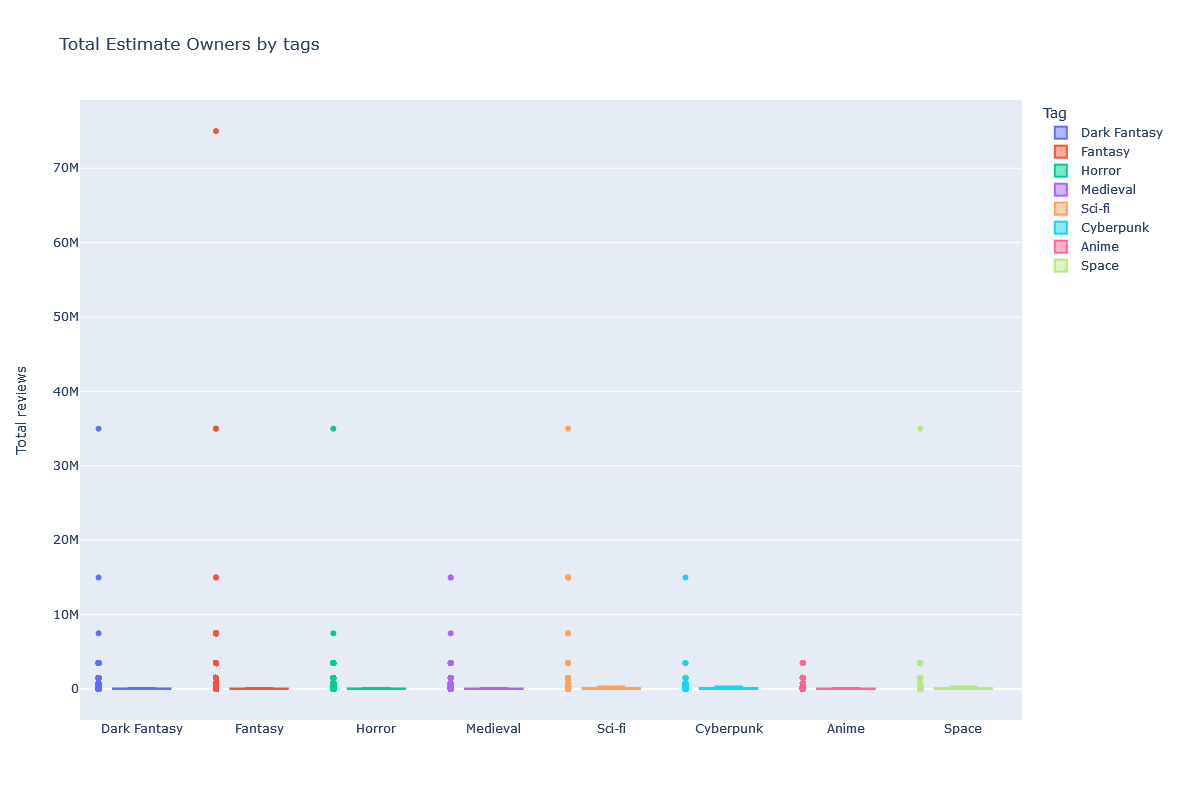

In [28]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["owners"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Owners: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Total Estimate Owners by tags",
    yaxis_title="Total reviews",
    legend_title="Tag",
    height=800
    )
    
fig.show()

#### Reviews

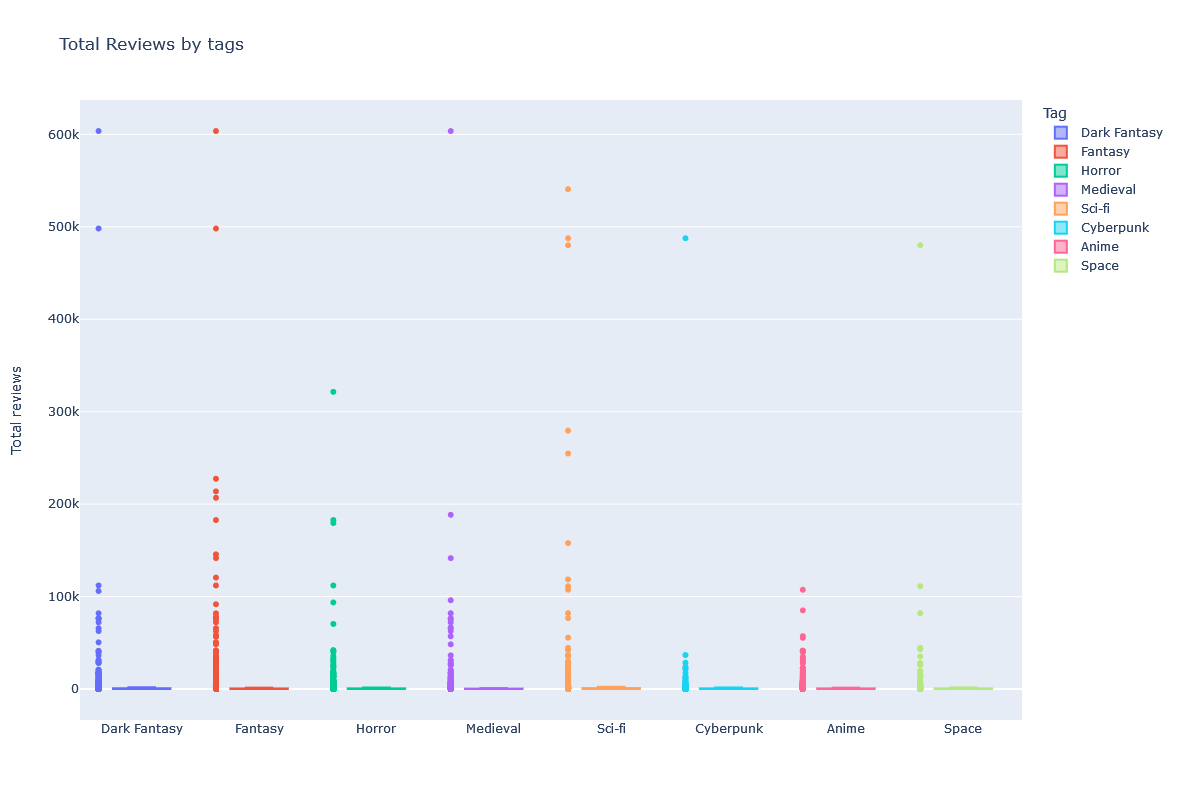

In [29]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["total_reviews"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Reviews: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Total Reviews by tags",
    yaxis_title="Total reviews",
    legend_title="Tag",
    height=800
    )
    
fig.show()

#### Ratings

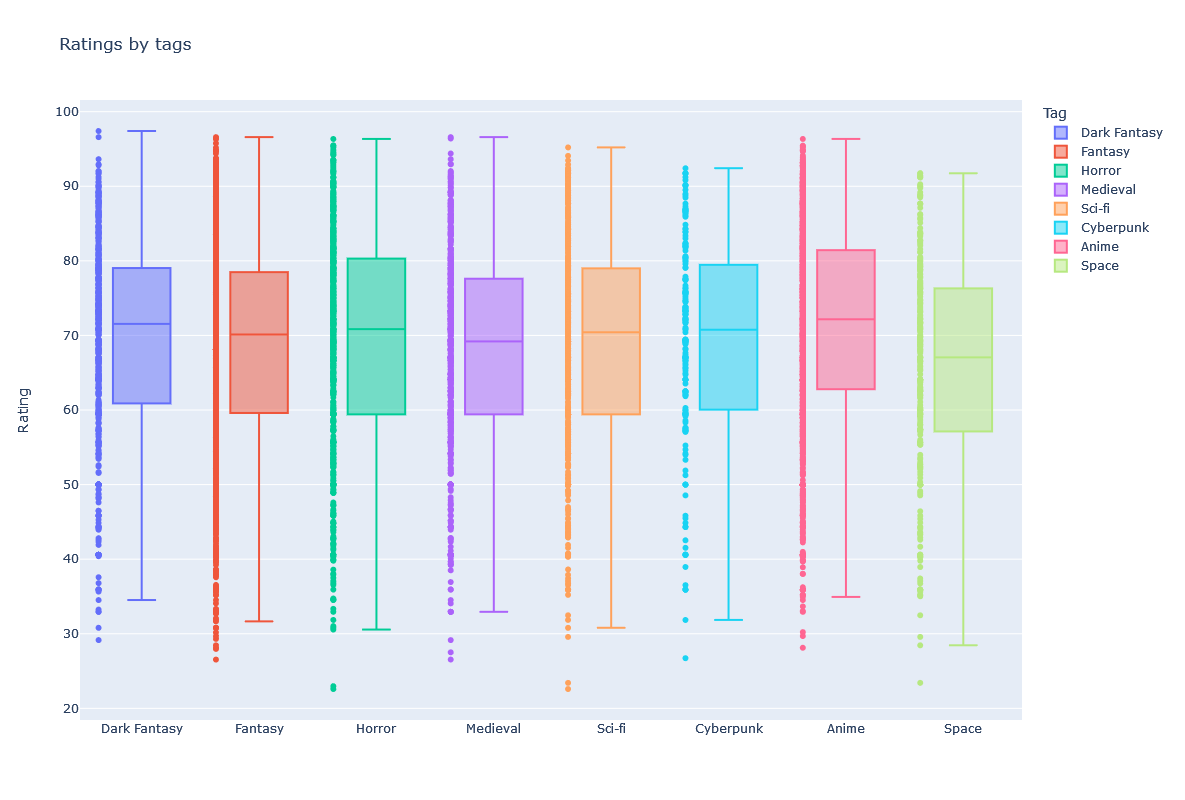

In [30]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["rating"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Rating: %{y:.2f}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Ratings by tags",
    yaxis_title="Rating",
    legend_title="Tag",
    height=800
    )
    
fig.show()

### Timelines

#### Making timeline DF

In [31]:
# making timeline datatframe
timeline_df = analysis_df[analysis_df['tags'].isin(['Sci-fi','Fantasy','Medieval'])].groupby(['release_date','tags']).agg(
                                total_owners=('owners', 'sum'),
                                average_owners=('owners', 'mean'),
                                median_owners=('owners', 'median'),
                                total_games=('name', 'count'),
                                total_reviews=('total_reviews', 'sum'),
                                median_ratings=('rating', 'median')
).reset_index()

#### Number of games

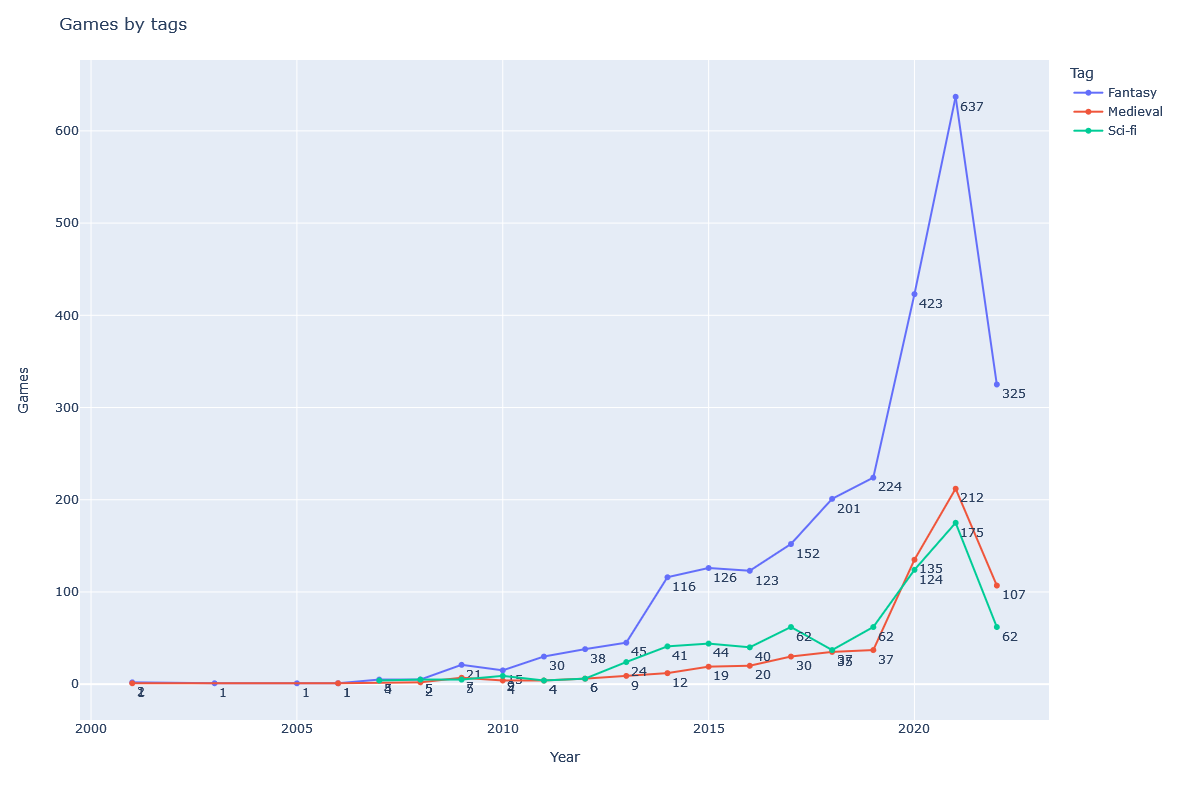

In [32]:
fig = px.line(timeline_df, x="release_date", y="total_games", color="tags", text="total_games", custom_data=['tags'])
fig.update_traces(
    textposition="bottom right",
    hovertemplate='<br>Tag: %{customdata[0]}<br>Release date: %{x}<br>Total games: %{text}'
                 )
fig.update_layout(
    title="Games by tags",
    yaxis_title="Games",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

#### Owners

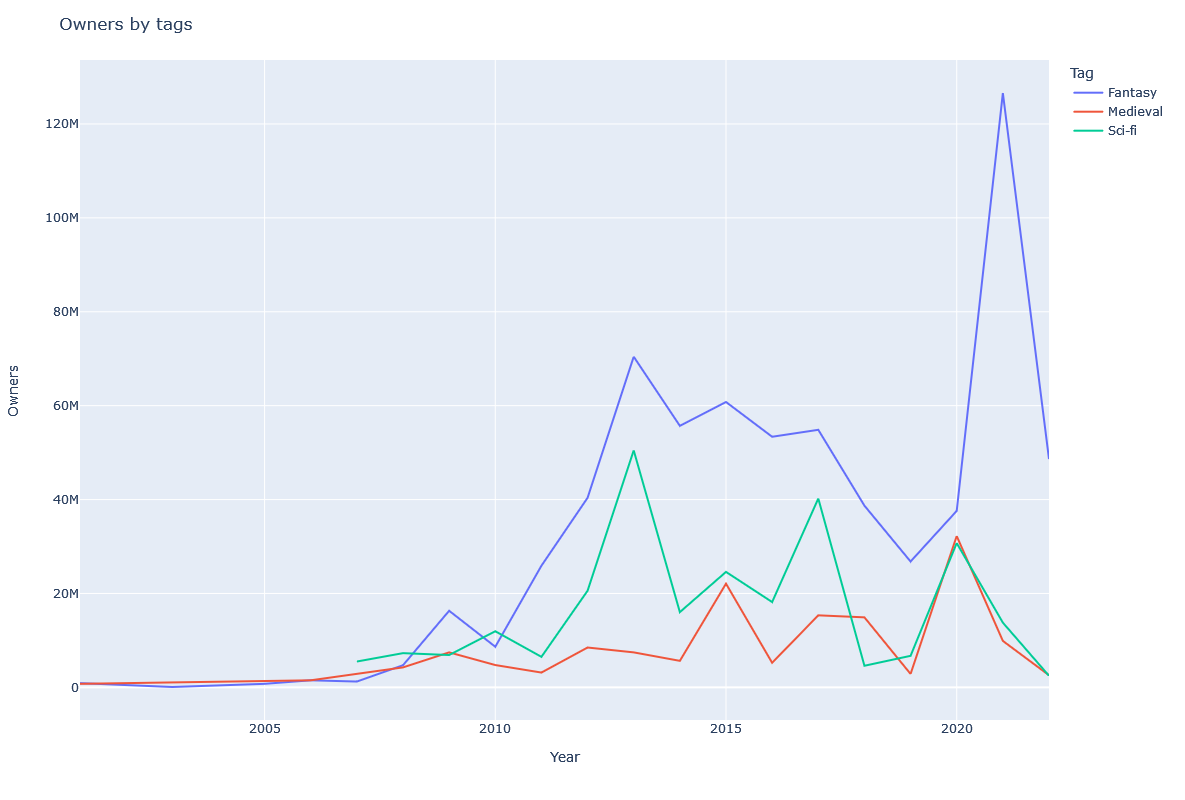

In [33]:
fig = px.line(timeline_df, x="release_date", y="total_owners", color="tags", custom_data=["tags"])
fig.update_traces(
    textposition="bottom right",
    hovertemplate='<br>Tag: %{customdata[0]}<br>Release date: %{x}<br>Estimate owners: %{y}'
                 )
fig.update_layout(
    title="Owners by tags",
    yaxis_title="Owners",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

#### Reviews

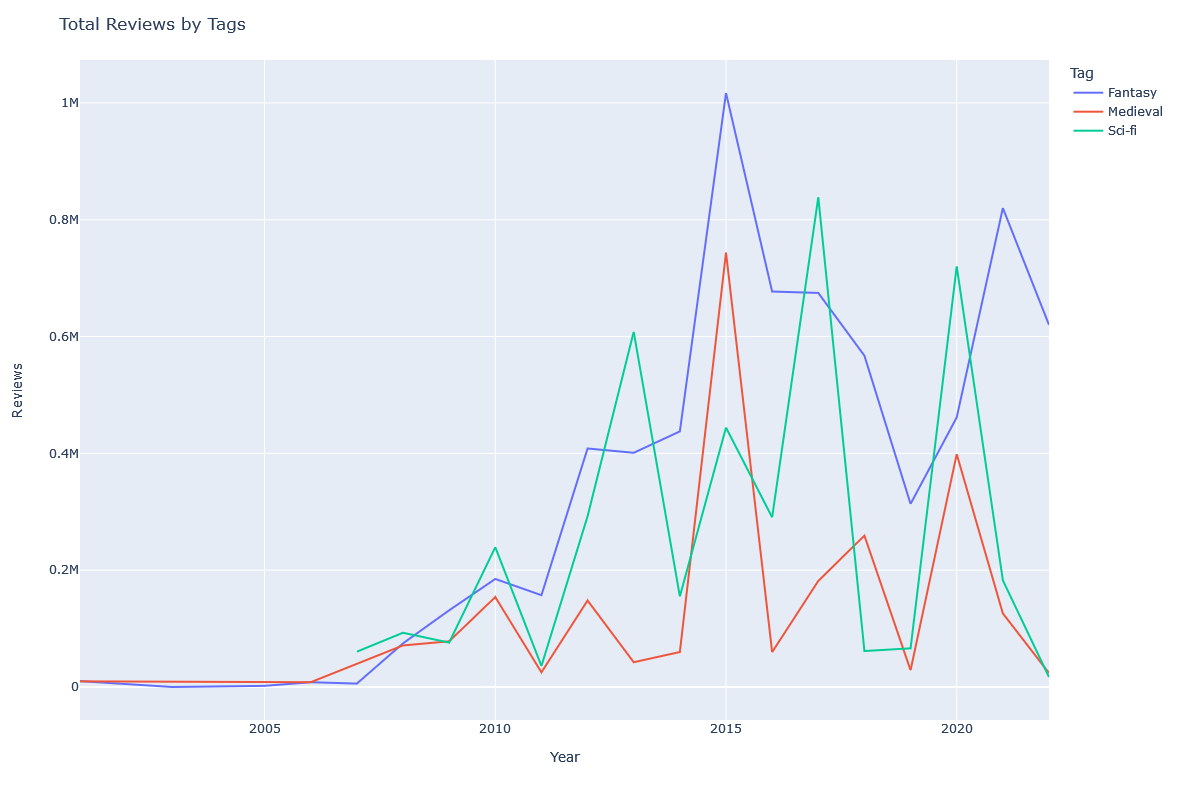

In [34]:
fig = px.line(timeline_df, x="release_date", y="total_reviews", color="tags", custom_data=["total_reviews"])
fig.update_traces(
    textposition="bottom right",
    hovertemplate='<br>Tag: %{customdata[0]}<br>Release date: %{x}<br>Total reviews: %{y}'
                 )
fig.update_layout(
    title="Total Reviews by Tags",
    yaxis_title="Reviews",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

#### Ratings

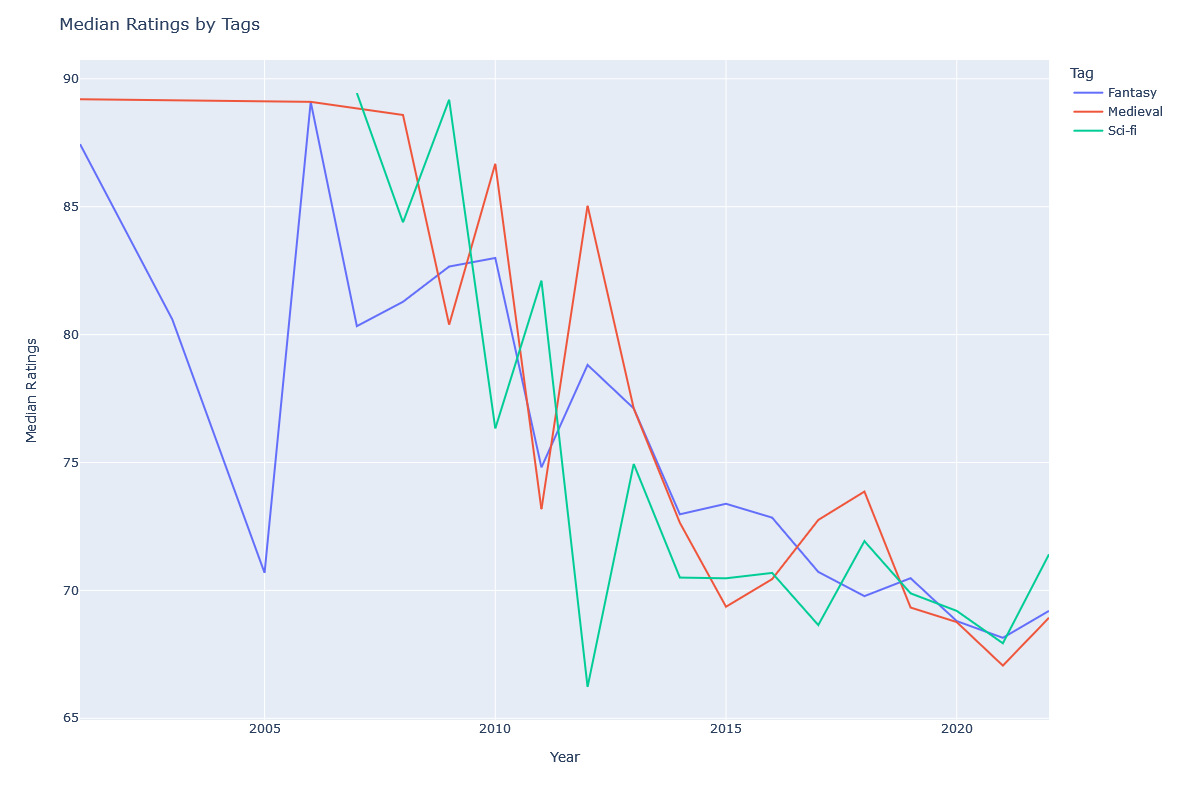

In [35]:
fig = px.line(timeline_df, x="release_date", y="median_ratings", color="tags", custom_data = ["tags"])
fig.update_traces(
    textposition="bottom right",
    hovertemplate='<br>Tag: %{customdata[0]}<br>Release date: %{x}<br>Median Rating: %{y:.2f}'
)
fig.update_layout(
    title="Median Ratings by Tags",
    yaxis_title="Median Ratings",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

## Analyzing the results

* While the results seem interesting for the casual view, they are influenced too much by the outliers and need an adjustment for that
* A lot of data is either estimate (Owners) or not very complete (the tags we are taking info from)
* We can still make some observations based on the number of releases and the data distribution

# Analysis Part 2: Day 1 DLCs: change over the years

## Task

* Determine how day 1 DLCs changed over the years for Steam
    * Have their number increased or decreased (taking only games with DLCs)?
    * How did the DLC price to base game price ratio changed?
    * Do users like day 1 DLCs? Reviews ratings for day 1 DLCs
    * What type of games usually use day 1 DLCs? Genres and tags.
    
## Reorganizing data

### We'll need this data:

#### From Steam:
* appid
* name
* type
* genres
* release_date
* coming_soon
* rating
* tags

#### Reorganizing:
* Filter out non-released games by coming_soon: False
* fullgame - transform to leave only appid
* add fullgame_release_date for DLCs by taking out the release_date column from the fullgame

### Data processing:

Let's write some code. I'll use the same analysis_df variable to store the processed data.

In [36]:
steam.sample(15)[['name','fullgame']]

name  fullgame
appid                                                            
2009120                        Wallpaper Alive Donation   2003310
1070710      Kind Words (lo fi chill beats to write to)      <NA>
257170                   Rebuild 3: Gangs of Deadsville      <NA>
1772130                                             Mik      <NA>
1110112      SENRAN KAGURA Peach Ball - Outfit Sextet 1   1074080
1335580                                     Monsty Corp      <NA>
851040               Darkest Mana : Master of the Table      <NA>
756500                   Noir Chronicles: City of Crime      <NA>
848770                           Krystal the Adventurer      <NA>
1779090                            FeetCry : ZombieLand      <NA>
1000500  The Undisputables : Online Multiplayer Shooter      <NA>
654520                   Travel Riddles: Trip To Greece      <NA>
1263680                                             486      <NA>
1663710                        Fitness Center Renovator      <NA>
1281490                               The Night is Grey      <NA>

In [37]:
# filtering out non-released games
analysis_df = steam[steam['coming_soon'] == False].copy()

# adding full game data to the dlcs (release date, name, price, genres, tags and rating)
def get_fullgame_data(row):
    if pd.isna(row['fullgame']):
        return {
                'fullgame_release_date': pd.NA,
                'fullgame_name': '',
                'fullgame_price': pd.NA,
                'fullgame_genres': [],
                'fullgame_tags': [],
                'fullgame_rating': pd.NA
            }
    else:
        try:
            fullgame_row = steam.loc[row['fullgame']]
            return {
                'fullgame_release_date': fullgame_row['release_date'],
                'fullgame_name': fullgame_row['name'],
                'fullgame_price': fullgame_row['price'],
                'fullgame_genres': fullgame_row['genres'],
                'fullgame_tags': fullgame_row['tags'],
                'fullgame_rating': fullgame_row['rating']
            }
        except:
            return {
                'fullgame_release_date': pd.NA,
                'fullgame_name': '',
                'fullgame_price': pd.NA,
                'fullgame_genres': [],
                'fullgame_tags': [],
                'fullgame_rating': pd.NA
            }
analysis_df[['fullgame_release_date',
             'fullgame_name',
             'fullgame_price',
             'fullgame_genres',
             'fullgame_tags',
             'fullgame_rating']] = analysis_df.apply(get_fullgame_data, axis=1, result_type='expand')
analysis_df = analysis_df.dropna(subset = ['fullgame_release_date'])
# adding a boolean column showing if the DLC is a day-0 
def day0(row):
    return row['fullgame_release_date']>=row['release_date']

# converting release_date to datetime
analysis_df['release_date'] = analysis_df['release_date'].apply(lambda x: pd.to_datetime(x))
analysis_df['fullgame_release_date'] = analysis_df['fullgame_release_date'].apply(lambda x: pd.to_datetime(x))

analysis_df['day0_dlc'] = analysis_df.apply(day0, axis=1)

Let's see the results:

In [38]:
analysis_df[analysis_df['type']=='dlc'].sample(10)[['fullgame_name','name',
                                                    'fullgame_release_date',
                                                    'release_date',
                                                    'day0_dlc']]

fullgame_name  \
appid                                               
599910                                 Rush Rover   
277760                    Train Simulator Classic   
1287070                     Monster Hunter: World   
959820   DragonFangZ - The Rose & Dungeon of Time   
566720             Half-Life: A Place in the West   
1114180                              逝去的回忆3：四叶草之梦   
1703964                  Tiger Fighter 1931 Tora!   
234777                Call of Duty®: Black Ops II   
1003740                                Space Maze   
722310                              Flappy Galaxy   

                                                      name  \
appid                                                        
599910                                    Rush Rover - OST   
277760   Train Simulator: Midland Main Line London-Bedf...   
1287070  Monster Hunter World: Iceborne - MHW:I Monster...   
959820    DragonFangZ - Extra Dungeon "The Inferno Hollow"   
566720                 Following Portents Video Commentary   
1114180                               04-【非必须品】逝3+逝外200元充值   
1703964                     Tiger Fighter 1931 Tora! MP005   
234777   Call of Duty®: Black Ops II - Zombies Personal...   
1003740                                     Space Maze OST   
722310                        Flappy Galaxy : Master Level   

        fullgame_release_date release_date  day0_dlc  
appid                                                 
599910             2017-11-29   2017-11-29      True  
277760             2022-04-21   2015-02-12      True  
1287070            2018-08-09   2020-07-08     False  
959820             2018-02-27   2018-12-12     False  
566720             2016-09-29   2016-12-13     False  
1114180            2019-08-16   2019-08-01      True  
1703964            2019-03-14   2021-07-31     False  
234777             2012-11-12   2013-04-12     False  
1003740            2018-08-19   2018-12-25     False  
722310             2017-10-19   2017-10-19      True

Now let's group the data up by the fullgame and summarize the data:

In [39]:
grouped_df = analysis_df.groupby(
    by = ['fullgame',
          'fullgame_name',
          'fullgame_release_date',
          'fullgame_price',
          'fullgame_genres',
          'fullgame_tags',
          'fullgame_rating',
          'day0_dlc']
).agg(
    dlc_count = ('name','count'),
    dlc_total_price = ('price','mean'),
    dlc_average_rating = ('rating','mean')    
).reset_index()
grouped_df['game_release_year'] = grouped_df['fullgame_release_date'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True).year)
grouped_df = grouped_df.drop('fullgame_release_date',axis=1)

In [40]:
grouped_df.describe()

fullgame  fullgame_price  fullgame_rating    dlc_count  \
count  7.633000e+03     7633.000000      7633.000000  7633.000000   
mean   7.680069e+05       12.460578        71.931546     3.993187   
std    4.280514e+05       13.774440        13.511585    27.718707   
min    3.800000e+02        0.000000        18.980581     1.000000   
25%    4.159100e+05        1.990000        63.793603     1.000000   
50%    6.836300e+05        8.190000        73.916876     1.000000   
75%    1.065550e+06       17.990000        81.988699     2.000000   
max    2.003320e+06      169.990000        96.906841  1678.000000   

       dlc_total_price  dlc_average_rating  game_release_year  
count      7488.000000         7633.000000        7633.000000  
mean          5.007324           59.170844        2017.756059  
std           7.814063           10.858214           2.547602  
min           0.000000           21.855132        2006.000000  
25%           0.990000           50.000000        2016.000000  
50%           2.990000           58.855002        2018.000000  
75%           5.916682           67.059371        2020.000000  
max         169.990000           94.058191        2022.000000

We can notice something very interesting. There seems to be some big outliers in the total number of DLCs for some games. We will have to remove them when making a chart for the number of DLCs.

In [41]:
grouped_df[grouped_df['dlc_count']>grouped_df.dlc_count.quantile(0.999)]

fullgame                                fullgame_name  fullgame_price  \
46       24010                      Train Simulator Classic           24.99   
331     221680         Rocksmith® 2014 Edition - Remastered           29.99   
332     221680         Rocksmith® 2014 Edition - Remastered           29.99   
530     252690                      Fantasy Grounds Classic           36.99   
986     314160  Microsoft Flight Simulator X: Steam Edition           24.99   
3132    582010                        Monster Hunter: World           29.99   
4611    838380                              DEAD OR ALIVE 6           69.99   
6301   1196310                        Fantasy Grounds Unity           33.99   

                   fullgame_genres  \
46                  ['Simulation']   
331       ['Casual', 'Simulation']   
332       ['Casual', 'Simulation']   
530   ['Indie', 'RPG', 'Strategy']   
986                 ['Simulation']   
3132                    ['Action']   
4611                    ['Action']   
6301  ['Indie', 'RPG', 'Strategy']   

                                          fullgame_tags  fullgame_rating  \
46    ['Simulation', 'Trains', 'Singleplayer', 'Real...        67.872298   
331   ['Music', 'Education', 'Simulation', 'Rhythm',...        89.765709   
332   ['Music', 'Education', 'Simulation', 'Rhythm',...        89.765709   
530   ['RPG', 'Software', 'Strategy', 'Online Co-Op'...        77.013109   
986   ['Flight', 'Simulation', 'Realistic', 'Multipl...        84.087391   
3132  ['Co-op', 'Multiplayer', 'Action', 'Open World...        85.645948   
4611  ['Fighting', 'Sexual Content', 'Action', 'Nudi...        71.492086   
6301  ['RPG', 'Dungeons & Dragons', 'Strategy', 'Ind...        81.442582   

      day0_dlc  dlc_count  dlc_total_price  dlc_average_rating  \
46        True        750        13.882333           61.260529   
331      False        772         4.401153           51.702881   
332       True        783         4.350153           54.459592   
530      False       1678        10.198729           50.172243   
986      False        266        18.601278           54.260714   
3132     False        215         2.556355           72.067597   
4611     False        463         4.725931           53.524504   
6301     False        586        13.750906           50.180097   

      game_release_year  
46                 2022  
331                2016  
332                2016  
530                2014  
986                2014  
3132               2018  
4611               2019  
6301               2020

## Making charts

### Number of DLCs

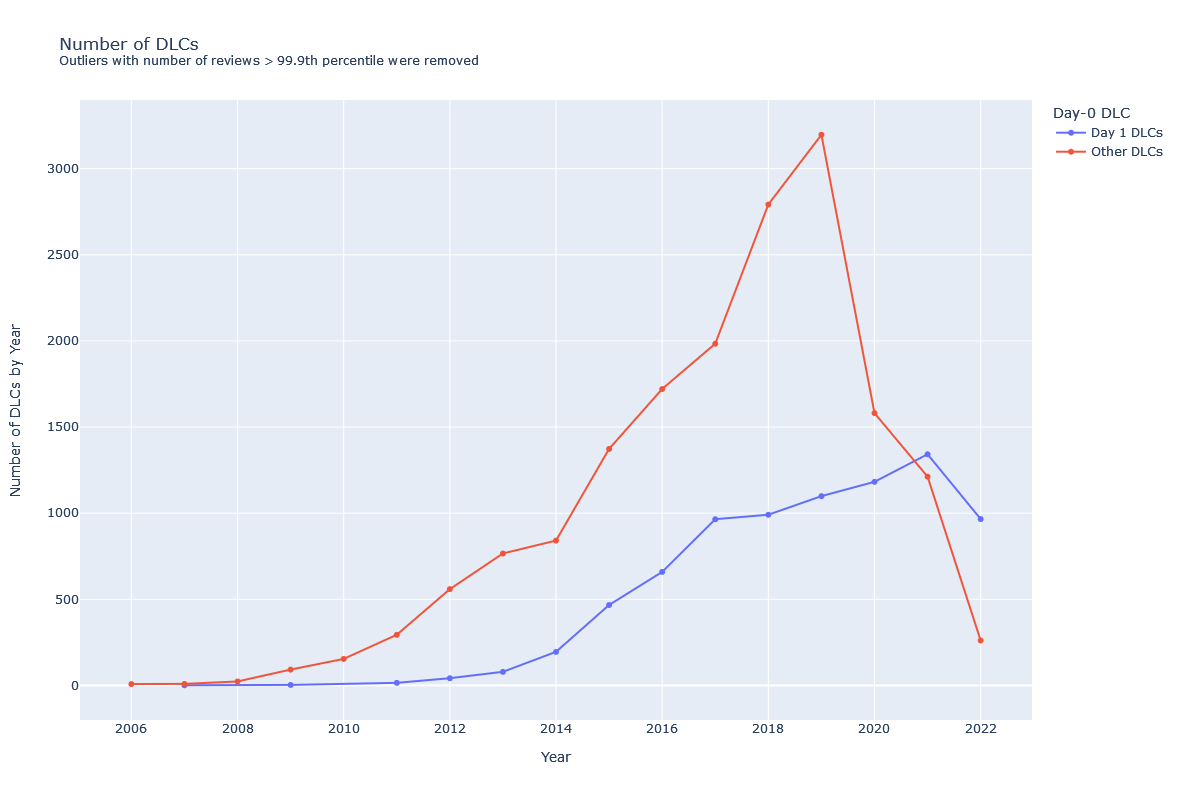

In [42]:
# We remove outliers first, then group by the release year and DLC type
# and create 2 line charts out of it.
outliers_dlc_count = grouped_df[grouped_df['dlc_count']>grouped_df.dlc_count.quantile(0.999)]
chart_df = grouped_df[
    ~grouped_df['fullgame'].isin(outliers_dlc_count['fullgame'])
].groupby(
    by=['day0_dlc','game_release_year']
).agg(
    dlc_count=('dlc_count','sum')
).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=chart_df[chart_df['day0_dlc']==True]['game_release_year'],
    y=chart_df[chart_df['day0_dlc']==True]['dlc_count'],
    hovertemplate='<br>Release Year: %{x}<br>Number of DLCs: %{y}',
    name='Day 1 DLCs'
))
fig.add_trace(go.Scatter(
    x=chart_df[chart_df['day0_dlc']==False]['game_release_year'],
    y=chart_df[chart_df['day0_dlc']==False]['dlc_count'],
    hovertemplate='<br>Release Year: %{x}<br>Number of DLCs: %{y}',
    name='Other DLCs'
))

fig.update_layout(
    title='Number of DLCs<br><sup>Outliers with number of reviews > 99.9th percentile were removed</sup>',
    yaxis_title='Number of DLCs by Year',
    xaxis_title='Year',
    legend_title='Day-0 DLC',
    height=800
    )
fig.show()

### Day-0 DLC price to the base game price ratio

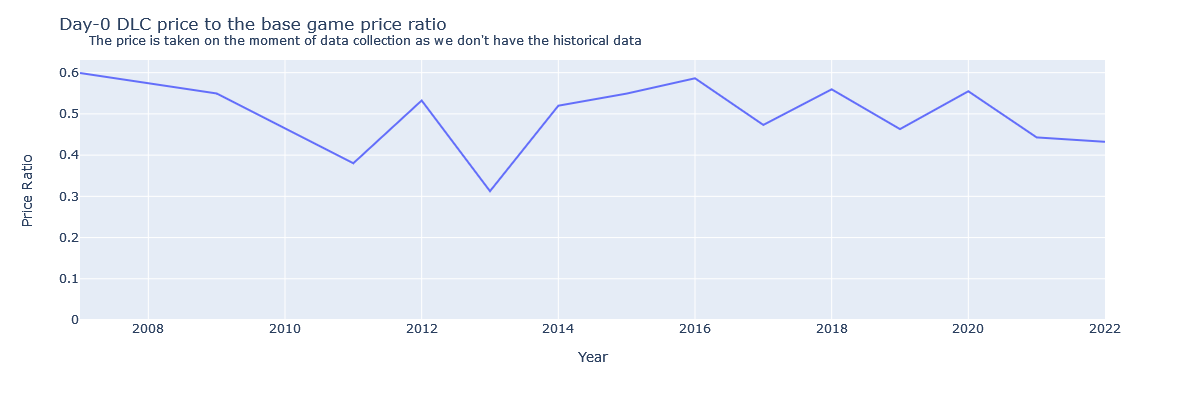

In [43]:
# We filter out the non-0 day DLCs and the games with price == 0
# Determine the Day-0 DLC/Base game price ratio for each game
# Group up by the release year, determine the mean
# And make charts
# Note: the price is taken on the moment of data collection as we don't have the historical data
chart_df = grouped_df[
    (grouped_df['day0_dlc']==True) & (grouped_df['fullgame_price'] > 0)
].copy()
chart_df['price_ratio'] = chart_df['dlc_total_price']/chart_df['fullgame_price']
chart_df = chart_df.groupby(
    by=['game_release_year']
).agg(
    price_ratio=('price_ratio','mean')
).reset_index()

fig = px.line(chart_df, x="game_release_year", y="price_ratio")
fig.update_traces(
    textposition="bottom right",
    hovertemplate='<br>Year of the Release: %{x}<br>Combined DLC price to game price ration: %{y:.2f}'
    )
fig.update_layout(
    title="""Day-0 DLC price to the base game price ratio<br>
    <sup>The price is taken on the moment of data collection as we don't have the historical data</sup>""",
    yaxis_title="Price Ratio",
    xaxis_title="Year",
    legend_title="Ratio",
    height=400
    )
fig.update_yaxes(rangemode="tozero")
fig.show()

### Average ratings for day-0 DLCs comparing to the average base game rating

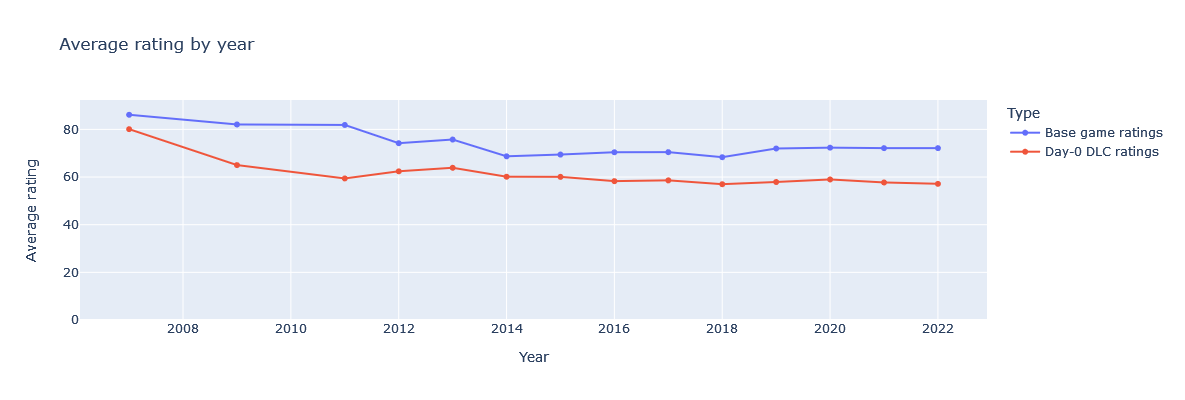

In [44]:
# We filter out the non-0 day DLCs
# Determine the average rating for Day-0 DLCs
# Group up by the release year, determine the average across the games
# And make charts
# Note: the price is taken on the moment of data collection as we don't have the historical data
chart_df = grouped_df[
    grouped_df['day0_dlc']==True
].copy()
chart_df = chart_df.groupby(
    by=['game_release_year']
).agg(
    average_base_rate=('fullgame_rating','mean'),
    average_dlc_rate=('dlc_average_rating','mean')
).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=chart_df['game_release_year'],
    y=chart_df['average_base_rate'],
    hovertemplate='<br>Release Year: %{x}<br>Average rating: %{y:.2f}',
    name='Base game ratings'
))
fig.add_trace(go.Scatter(
    x=chart_df['game_release_year'],
    y=chart_df['average_dlc_rate'],
    hovertemplate='<br>Release Year: %{x}<br>Average rating: %{y:.2f}',
    name='Day-0 DLC ratings'
))

fig.update_layout(
    title='Average rating by year',
    yaxis_title='Average rating',
    xaxis_title='Year',
    legend_title='Type',
    height=400
    )
fig.update_yaxes(rangemode="tozero")
fig.show()

### Genres for the games with day-0 DLCs

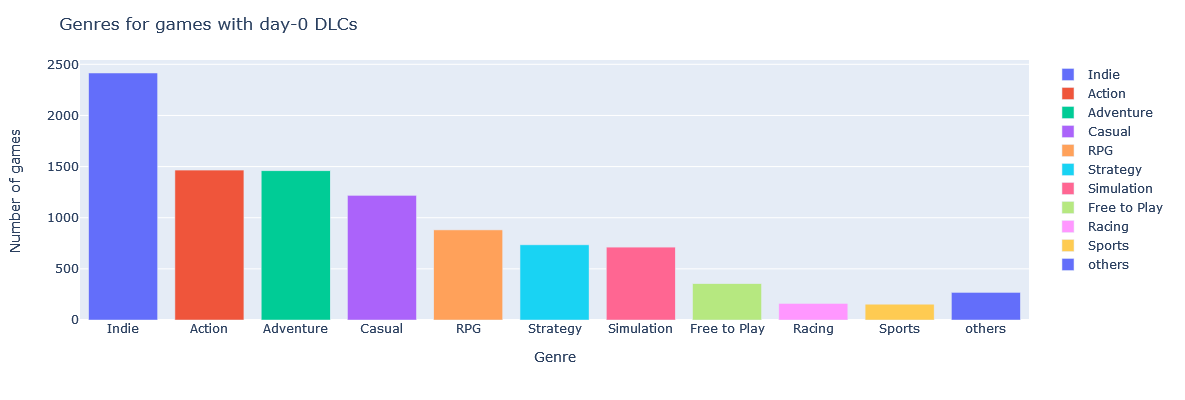

In [45]:
temp_df = grouped_df[grouped_df['day0_dlc']==True]
# Counting genres for each game with day-0 DLCs
day0_genres = {}
for index, row in temp_df.iterrows():
    genres = ast.literal_eval(row['fullgame_genres'])
    if isinstance(genres, list):
        for genre in genres:
            if genre in day0_genres.keys():
                day0_genres[genre]+=1
            else:
                day0_genres[genre]=1
temp_df = pd.DataFrame(day0_genres, index=["games_count"]).T.sort_values(by='games_count', ascending=False)
chart_df = temp_df.iloc[:10]

chart_df = pd.concat([chart_df,
          pd.DataFrame(index = ['others'],
                       columns = ['games_count'],
                       data = [temp_df["games_count"].iloc[10:].sum()]
                      )
          ])
# making a bar chart
fig = px.bar(
    chart_df,
    y="games_count",
    color=chart_df.index
)
fig.update_traces(hovertemplate='<br>Genre: %{x}<br>Games count: %{y}')
fig.update_layout(
    title="Genres for games with day-0 DLCs",
    yaxis_title="Number of games",
    xaxis_title="Genre",
    legend_title = None,
    height=400
    )
fig.show()

### Tags for the games with day-0 DLCs

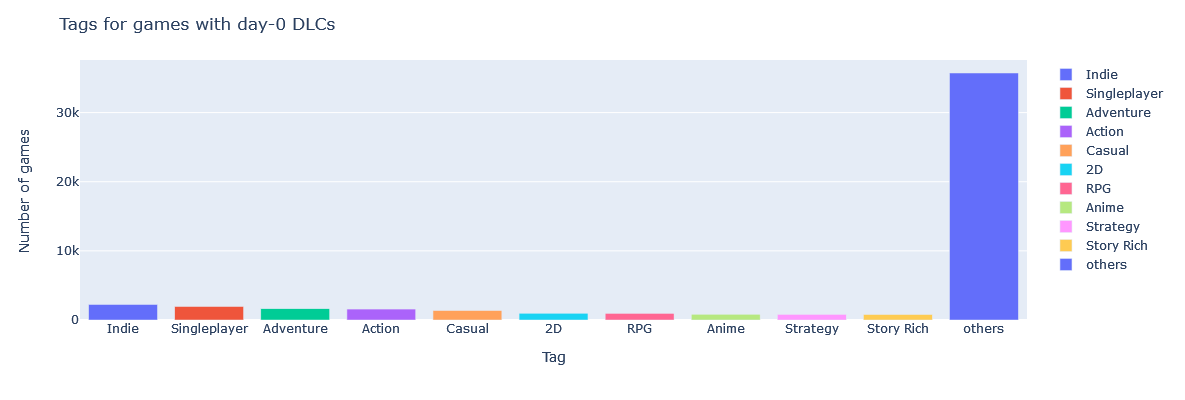

In [46]:
temp_df = grouped_df[grouped_df['day0_dlc']==True]
# Counting genres for each game with day-0 DLCs
day0_tags = {}
for index, row in temp_df.iterrows():
    tags = ast.literal_eval(row['fullgame_tags'])
    if isinstance(genres, list):
        for tag in tags:
            if tag in day0_tags.keys():
                day0_tags[tag]+=1
            else:
                day0_tags[tag]=1
temp_df = pd.DataFrame(day0_tags, index=["games_count"]).T.sort_values(by='games_count', ascending=False)
chart_df = temp_df.iloc[:10]

chart_df = pd.concat([chart_df,
          pd.DataFrame(index = ['others'],
                       columns = ['games_count'],
                       data = [temp_df["games_count"].iloc[10:].sum()]
                      )
          ])
# making a bar chart
fig = px.bar(
    chart_df,
    y="games_count",
    color=chart_df.index
)
fig.update_traces(hovertemplate='<br>Tag: %{x}<br>Games count: %{y}')
fig.update_layout(
    title="Tags for games with day-0 DLCs",
    yaxis_title="Number of games",
    xaxis_title="Tag",
    legend_title = None,
    height=400
    )
fig.show()

## Analyzing the results

* The number of day-0 DLCs slowly increased with the total number of DLCs but in 2020 and 2021 the number of day-0 DLC has become close to all others DLCs
* The ratio of the day-0 DLC price to the game price consistently stays around the 0.4-0.6
* Average ratings for Day-0 DLCs are consistently below the ratings for the base game
* Top genres/tags for the games with Day-0 DLCs looks similar but that's caused by the overall popularity of the said genres/tags (you can check that by going through all of the games, for example)